<a href="https://colab.research.google.com/github/papycoda/fastAPI_urlshortener/blob/main/iot_simple_tensorflow_federated_learning_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os


In [5]:
! kaggle datasets list
#chmod 600 /root/.kaggle/kaggle.json

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/global-youtube-statistics-2023                 Global YouTube Statistics 2023                       60KB  2023-07-28 15:36:38          14333        477  1.0              
mohammadtalib786/retail-sales-dataset                           Retail Sales Dataset                                 11KB  2023-08-22 18:33:09           1364         33  1.0              
nelgiriyewithana/top-spotify-songs-2023                         Most Streamed Spotify Songs 2023                     47KB  2023-08-26 11:04:57           3373        115  1.0              
joebeachcapital/linkedin-jobs                               

In [6]:
! kaggle datasets download -d mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot

100% 1.62G/1.63G [00:57<00:00, 32.5MB/s]
100% 1.63G/1.63G [00:57<00:00, 30.1MB/s]


In [ ]:
df = pd.read_csv('../input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv', low_memory=False)

In [ ]:
df.head()

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,2021 11:44:10.081753000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,2021 11:44:10.162218000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0,0,Normal
2,2021 11:44:10.162271000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
3,2021 11:44:10.162641000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
4,2021 11:44:10.166132000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,Temperature_and_Humidity,24.0,0.0,0.0,0.0,0.0,0,Normal


In [ ]:
df["Attack_type"].value_counts()

Normal                   1615643
DDoS_UDP                  121568
DDoS_ICMP                 116436
SQL_injection              51203
Password                   50153
Vulnerability_scanner      50110
DDoS_TCP                   50062
DDoS_HTTP                  49911
Uploading                  37634
Backdoor                   24862
Port_Scanning              22564
XSS                        15915
Ransomware                 10925
MITM                        1214
Fingerprinting              1001
Name: Attack_type, dtype: int64

<AxesSubplot:title={'center':'Class Distribution'}, ylabel='None'>

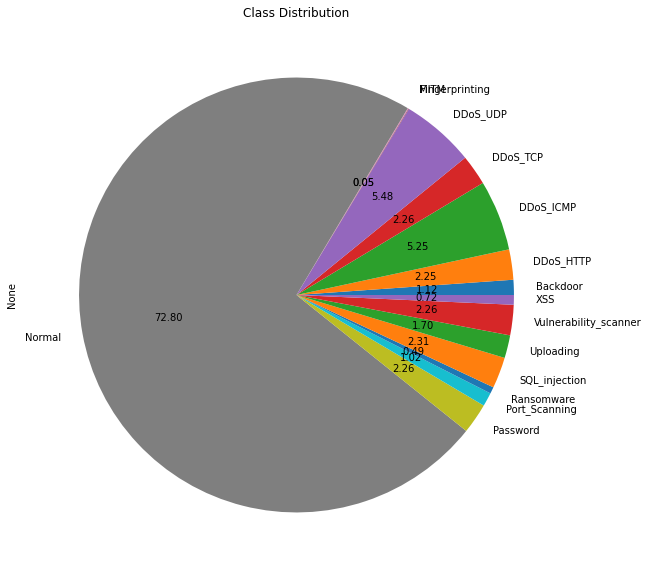

In [ ]:
from matplotlib import pyplot as plt

plt.title("Class Distribution")
df.groupby("Attack_type").size().plot(kind='pie', autopct='%.2f', figsize=(20,10))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219201 entries, 0 to 2219200
Data columns (total 63 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   frame.time                 object 
 1   ip.src_host                object 
 2   ip.dst_host                object 
 3   arp.dst.proto_ipv4         object 
 4   arp.opcode                 float64
 5   arp.hw.size                float64
 6   arp.src.proto_ipv4         object 
 7   icmp.checksum              float64
 8   icmp.seq_le                float64
 9   icmp.transmit_timestamp    float64
 10  icmp.unused                float64
 11  http.file_data             object 
 12  http.content_length        float64
 13  http.request.uri.query     object 
 14  http.request.method        object 
 15  http.referer               object 
 16  http.request.full_uri      object 
 17  http.request.version       object 
 18  http.response              float64
 19  http.tls_port              float64
 20  tc

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df.head()

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,2021 16:08:53.216723000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,2021 12:33:38.837390000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
2,2021 17:25:19.102658000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
3,2021 21:49:50.978418000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
4,2021 00:04:52.255943000,192.168.0.128,192.168.0.170,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Ransomware


In [ ]:
from sklearn.utils import shuffle

drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4",

         "http.file_data","http.request.full_uri","icmp.transmit_timestamp",

         "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",

         "tcp.dstport", "udp.port", "mqtt.msg"]

df.drop(drop_columns, axis=1, inplace=True)

df.dropna(axis=0, how='any', inplace=True)

df.drop_duplicates(subset=None, keep="first", inplace=True)

df = shuffle(df)

df.isna().sum()

arp.opcode                   0
arp.hw.size                  0
icmp.checksum                0
icmp.seq_le                  0
icmp.unused                  0
http.content_length          0
http.request.method          0
http.referer                 0
http.request.version         0
http.response                0
http.tls_port                0
tcp.ack                      0
tcp.ack_raw                  0
tcp.checksum                 0
tcp.connection.fin           0
tcp.connection.rst           0
tcp.connection.syn           0
tcp.connection.synack        0
tcp.flags                    0
tcp.flags.ack                0
tcp.len                      0
tcp.seq                      0
udp.stream                   0
udp.time_delta               0
dns.qry.name                 0
dns.qry.name.len             0
dns.qry.qu                   0
dns.qry.type                 0
dns.retransmission           0
dns.retransmit_request       0
dns.retransmit_request_in    0
mqtt.conack.flags            0
mqtt.con

In [ ]:
import random

num_client = 10

df["client"] = ["client_{}".format(random.randint(1, num_client)) for _ in range(df.shape[0])]

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["Attack_type"])

In [ ]:
train_df.head()

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,tcp.ack_raw,...,mqtt.conack.flags-1471198,mqtt.conack.flags-1471199,mqtt.conack.flags-1574358,mqtt.conack.flags-1574359,mqtt.protoname-0,mqtt.protoname-0.0,mqtt.protoname-MQTT,mqtt.topic-0,mqtt.topic-0.0,mqtt.topic-Temperature_and_Humidity
1731378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28613809.0,1.167466e+09,...,0,0,0,0,1,0,0,1,0,0
1490904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.819220e+09,...,0,0,0,0,0,1,0,0,1,0
1494206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16252.0,2.371641e+09,...,0,0,0,0,1,0,0,1,0,0
1213041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,3.559501e+08,...,0,0,0,0,1,0,0,1,0,0
666362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.047234e+07,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
features = list(train_df.columns)
features.remove("Attack_type")
features.remove("client")
features

['arp.opcode',
 'arp.hw.size',
 'icmp.checksum',
 'icmp.seq_le',
 'icmp.unused',
 'http.content_length',
 'http.response',
 'http.tls_port',
 'tcp.ack',
 'tcp.ack_raw',
 'tcp.checksum',
 'tcp.connection.fin',
 'tcp.connection.rst',
 'tcp.connection.syn',
 'tcp.connection.synack',
 'tcp.flags',
 'tcp.flags.ack',
 'tcp.len',
 'tcp.seq',
 'udp.stream',
 'udp.time_delta',
 'dns.qry.name',
 'dns.qry.qu',
 'dns.qry.type',
 'dns.retransmission',
 'dns.retransmit_request',
 'dns.retransmit_request_in',
 'mqtt.conflag.cleansess',
 'mqtt.conflags',
 'mqtt.hdrflags',
 'mqtt.len',
 'mqtt.msg_decoded_as',
 'mqtt.msgtype',
 'mqtt.proto_len',
 'mqtt.topic_len',
 'mqtt.ver',
 'mbtcp.len',
 'mbtcp.trans_id',
 'mbtcp.unit_id',
 'Attack_label',
 'http.request.method-0',
 'http.request.method-0.0',
 'http.request.method-GET',
 'http.request.method-OPTIONS',
 'http.request.method-POST',
 'http.request.method-PROPFIND',
 'http.request.method-PUT',
 'http.request.method-SEARCH',
 'http.request.method-TRACE',

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_df["Attack_type"] = label_encoder.fit_transform(train_df["Attack_type"])
test_df["Attack_type"] = label_encoder.transform(test_df["Attack_type"])

In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

def encode_text_dummy(df, name):

    dummies = pd.get_dummies(df[name])

    for x in dummies.columns:

        dummy_name = f"{name}-{x}"

        df[dummy_name] = dummies[x]

    df.drop(name, axis=1, inplace=True)

encode_text_dummy(df,'http.request.method')

encode_text_dummy(df,'http.referer')

encode_text_dummy(df,"http.request.version")

encode_text_dummy(df,"dns.qry.name.len")

encode_text_dummy(df,"mqtt.conack.flags")

encode_text_dummy(df,"mqtt.protoname")

encode_text_dummy(df,"mqtt.topic")

In [ ]:
df.to_csv('preprocessed_DNN.csv', encoding='utf-8')
df.head()

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,tcp.ack_raw,...,mqtt.conack.flags-1471198,mqtt.conack.flags-1471199,mqtt.conack.flags-1574358,mqtt.conack.flags-1574359,mqtt.protoname-0,mqtt.protoname-0.0,mqtt.protoname-MQTT,mqtt.topic-0,mqtt.topic-0.0,mqtt.topic-Temperature_and_Humidity
715653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.975567e+09,...,0,0,0,0,0,1,0,0,1,0
343404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,2.081796e+09,...,0,0,0,0,1,0,0,1,0,0
70977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.0,2.323405e+09,...,0,0,0,0,0,1,0,0,1,0
1272729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39026378.0,1.177878e+09,...,0,0,0,0,1,0,0,1,0,0
344242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,3.970277e+09,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_df[features] = scaler.fit_transform(train_df[features])
test_df[features] = scaler.transform(test_df[features])

In [ ]:
train_df[features] = train_df[features].astype("float32")
test_df[features] = test_df[features].astype("float32")

train_df["Attack_type"] = train_df["Attack_type"].astype("int32")
test_df["Attack_type"] = test_df["Attack_type"].astype("int32")

In [ ]:
!pip uninstall --yes tensorflow_federated
!pip install --quiet tensorflow
!pip install --quiet --upgrade tensorflow-federated


Found existing installation: tensorflow-federated 0.33.0
Uninstalling tensorflow-federated-0.33.0:
  Successfully uninstalled tensorflow-federated-0.33.0


In [ ]:
!pip install --quiet --upgrade nest_asyncio

In [ ]:
import tensorflow as tf
import tensorflow_federated as tff

In [ ]:
import nest_asyncio
nest_asyncio.apply()

In [ ]:
%load_ext tensorboard

In [ ]:
import collections

np.random.seed(0)

tff.federated_computation(lambda: 'Hello, World!')()

In [ ]:
client_id_colname = 'client'

client_ids = df[client_id_colname].unique()

train_client_ids = pd.DataFrame(client_ids).sample(frac=0.8).values.ravel().tolist()
test_client_ids = [x for x in client_ids if x not in train_client_ids]

In [ ]:
train_client_ids

In [ ]:
from collections import OrderedDict
from tensorflow.keras.utils import to_categorical

NUM_EPOCHS = 1
SHUFFLE_BUFFER = 100
PREFETCH_BUFFER = 5

def create_tf_dataset_for_client_fn(client_id):
    client_data = dataframe[dataframe[client_id_colname] == client_id]
    client_data_dict = OrderedDict()
    client_data_dict["features"] = np.array(client_data[features].values, dtype="float32")
    client_data_dict["label"] = np.array(client_data["type"].values, dtype="int32")

    dataset = tf.data.Dataset.from_tensor_slices(client_data_dict)
    dataset = dataset.shuffle(SHUFFLE_BUFFER).batch(1).repeat(NUM_EPOCHS)
    return dataset

In [ ]:
dataframe = train_df
train_data = tff.simulation.datasets.ClientData.from_clients_and_tf_fn(
    client_ids=train_client_ids,
    serializable_dataset_fn=create_tf_dataset_for_client_fn)

dataframe = test_df
test_data = tff.simulation.datasets.ClientData.from_clients_and_tf_fn(
    client_ids=test_client_ids,
    serializable_dataset_fn=create_tf_dataset_for_client_fn)

In [ ]:
train_data.element_type_structure

In [ ]:
test_data.element_type_structure

In [ ]:
example_dataset = train_data.create_tf_dataset_for_client(train_data.client_ids[0])

example_element = next(iter(example_dataset))

example_element['label'].numpy()

In [ ]:
from collections import defaultdict

f = plt.figure(figsize=(20, 10))
f.suptitle('Label Counts for a Sample of Clients')
for i, c_ids in enumerate(train_data.client_ids):
    client_dataset = train_data.create_tf_dataset_for_client(c_ids)
    plot_data = defaultdict(list)
    for example in client_dataset:
        label = example['label'].numpy()[0]
        plot_data[label].append(label)
    plt.subplot(2, 4, i+1)
    plt.title('Client {}'.format(c_ids))
    for j in range(10):
        plt.hist(plot_data[j], density=False, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [ ]:
import collections

NUM_EPOCHS = 5
BATCH_SIZE = 128
SHUFFLE_BUFFER = 100
PREFETCH_BUFFER = 10

def preprocess(dataset):
    def batch_format_fn(element):
        return collections.OrderedDict(x=tf.reshape(element['features'], [-1, len(features)]),
                                       y=tf.reshape(element['label'], [-1, 1]))

    return dataset.repeat(NUM_EPOCHS).shuffle(SHUFFLE_BUFFER, seed=1).batch(
      BATCH_SIZE).map(batch_format_fn).prefetch(PREFETCH_BUFFER)

In [ ]:
preprocessed_example_dataset = preprocess(example_dataset)

sample_batch = tf.nest.map_structure(lambda x: x.numpy(),
                                     next(iter(preprocessed_example_dataset)))

# sample_batch

In [ ]:
from tqdm import tqdm

def make_federated_data(client_data, client_ids):
    return [preprocess(client_data.create_tf_dataset_for_client(x)) for x in tqdm(client_ids)]

In [ ]:
NUM_CLIENTS = len(np.unique(train_df[client_id_colname]))

sample_clients = train_data.client_ids[0:NUM_CLIENTS]

federated_train_data = make_federated_data(train_data, sample_clients)

print('Number of client datasets: {l}'.format(l=len(federated_train_data)))
print('First dataset: {d}'.format(d=federated_train_data[0]))

In [ ]:
def create_keras_model():
    filters = 32
    input_shape = (len(features))
    num_classes = len(label_encoder.classes_)
    clf = tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(64, input_dim=input_shape, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(num_classes, activation='softmax')
        ])
    return clf

keras_model = create_keras_model()
keras_model.summary()

In [ ]:
import keras.backend as K

class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='F1-Score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.f1_score = self.add_weight(name='f1_score', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        true_positives = tf.math.reduce_sum(tf.math.round(tf.clip_by_value(y_true * y_pred, 0, 1)))

        possible_positives = tf.math.reduce_sum(tf.math.round(tf.clip_by_value(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())

        predicted_positives = tf.math.reduce_sum(tf.math.round(tf.clip_by_value(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())

        self.f1_score.assign(2*((precision*recall)/(precision+recall+K.epsilon())))

    def result(self):
        return self.f1_score

    def reset_states(self):
        self.f1_score.assign(0.0)

In [ ]:
from keras.metrics import Recall, Precision

def model_fn():
    keras_model = create_keras_model()
    return tff.learning.from_keras_model(
        keras_model,
        input_spec=preprocessed_example_dataset.element_spec,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
iterative_process = tff.learning.build_federated_averaging_process(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.Adam(learning_rate=0.001),
    server_optimizer_fn=lambda: tf.keras.optimizers.Adam(learning_rate=0.002))

In [ ]:
str(iterative_process.initialize.type_signature)

In [ ]:
state = iterative_process.initialize()

In [ ]:
state, metrics = iterative_process.next(state, federated_train_data)
print('round  1, metrics={}'.format(metrics))

In [ ]:
NUM_ROUNDS = 11
for round_num in range(2, NUM_ROUNDS):
    state, metrics = iterative_process.next(state, federated_train_data)
    print('round {:2d}, metrics={}'.format(round_num, metrics))

In [ ]:
train_logdir = "training/"
os.makedirs(train_logdir, exist_ok=True)

test_logdir = "testing/"
os.makedirs(test_logdir, exist_ok=True)

In [ ]:
summary_writer = tf.summary.create_file_writer(train_logdir)
state = iterative_process.initialize()

In [ ]:
with summary_writer.as_default():
    for round_num in range(1, NUM_ROUNDS):
        state, metrics = iterative_process.next(state, federated_train_data)
        for name, value in metrics['train'].items():
            tf.summary.scalar(name, value, step=round_num)

In [ ]:
#@test {"skip": true}
!ls {train_logdir}
%tensorboard --logdir {train_logdir} --port=0

In [ ]:
ModelVariables = collections.namedtuple('ModelVariables', 'weights bias num_examples loss_sum accuracy_sum')

In [ ]:
def create_model_variables():
    return ModelVariables(
        weights=tf.Variable(
            lambda: tf.zeros(dtype=tf.float32, shape=(len(features), len(label_encoder.classes_))),
            name='weights',
            trainable=True),
        bias=tf.Variable(
            lambda: tf.zeros(dtype=tf.float32, shape=(len(label_encoder.classes_))),
            name='bias',
            trainable=True),
        num_examples=tf.Variable(0.0, name='num_examples', trainable=False),
        loss_sum=tf.Variable(0.0, name='loss_sum', trainable=False),
        accuracy_sum=tf.Variable(0.0, name='accuracy_sum', trainable=False))

In [ ]:
def predict_on_batch(variables, x):
    return tf.nn.softmax(tf.matmul(x, variables.weights) + variables.bias)

def model_forward_pass(variables, batch):
    y = predict_on_batch(variables, batch['x'])
    predictions = tf.cast(tf.argmax(y, 1), tf.int32)

    flat_labels = tf.reshape(batch['y'], [-1])
    loss = -tf.reduce_mean(tf.reduce_sum(tf.one_hot(flat_labels, len(label_encoder.classes_)) * tf.math.log(y), axis=[1]))
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions, flat_labels), tf.float32))
    num_examples = tf.cast(tf.size(batch['y']), tf.float32)
    variables.num_examples.assign_add(num_examples)
    variables.loss_sum.assign_add(loss * num_examples)
    variables.accuracy_sum.assign_add(accuracy * num_examples)
    return loss, predictions

In [ ]:
def get_local_model_metrics(variables):
    return collections.OrderedDict(
        num_examples=variables.num_examples,
        loss=variables.loss_sum / variables.num_examples,
        accuracy=variables.accuracy_sum / variables.num_examples)

In [ ]:
@tff.federated_computation
def aggregate_model_metrics_across_clients(metrics):
    return collections.OrderedDict(
        num_examples=tff.federated_sum(metrics.num_examples),
        loss=tff.federated_mean(metrics.loss, metrics.num_examples),
        accuracy=tff.federated_mean(metrics.accuracy, metrics.num_examples))


In [ ]:
from typing import Callable, List, OrderedDict

class IOTModel(tff.learning.Model):
    def __init__(self):
        self._variables = create_model_variables()
    @property
    def trainable_variables(self):
        return [self._variables.weights, self._variables.bias]

    @property
    def non_trainable_variables(self):
        return []

    @property
    def local_variables(self):
        return [
            self._variables.num_examples, self._variables.loss_sum,
            self._variables.accuracy_sum
        ]

    @property
    def input_spec(self):
        return OrderedDict(
            x=tf.TensorSpec([None, len(features)], tf.float32),
            y=tf.TensorSpec([None, 1], tf.int32))

    @tf.function
    def predict_on_batch(self, x, training=True):
        del training
        return predict_on_batch(self._variables, x)

    @tf.function
    def forward_pass(self, batch, training=True):
        del training
        loss, predictions = model_forward_pass(self._variables, batch)
        num_exmaples = tf.shape(batch['x'])[0]
        return tff.learning.BatchOutput(loss=loss, predictions=predictions, num_examples=num_exmaples)

    @tf.function
    def report_local_outputs(self):
        return get_local_model_metrics(self._variables)

    @property
    def federated_output_computation(self):
        return aggregate_model_metrics_across_clients

    @tf.function
    def report_local_unfinalized_metrics(self) -> OrderedDict[str, List[tf.Tensor]]:
        """Creates an `OrderedDict` of metric names to unfinalized values."""
        return collections.OrderedDict(
            num_examples=[self._variables.num_examples],
            loss=[self._variables.loss_sum, self._variables.num_examples],
            accuracy=[self._variables.accuracy_sum, self._variables.num_examples])

    def metric_finalizers(self) -> OrderedDict[str, Callable[[List[tf.Tensor]], tf.Tensor]]:
        """Creates an `OrderedDict` of metric names to finalizers."""
        return collections.OrderedDict(
            num_examples=tf.function(func=lambda x: x[0]),
            loss=tf.function(func=lambda x: x[0] / x[1]),
            accuracy=tf.function(func=lambda x: x[0] / x[1]))

In [ ]:
iterative_process = tff.learning.build_federated_averaging_process(
    IOTModel,
    client_optimizer_fn=lambda: tf.keras.optimizers.Adam(learning_rate=0.001))

In [ ]:
state = iterative_process.initialize()

In [ ]:
state, metrics = iterative_process.next(state, federated_train_data)
print('round  1, metrics={}'.format(metrics))

In [ ]:
for round_num in range(2, 11):
    state, metrics = iterative_process.next(state, federated_train_data)
    print('round {:2d}, metrics={}'.format(round_num, metrics))

In [ ]:
evaluation = tff.learning.build_federated_evaluation(IOTModel)

In [ ]:
str(evaluation.type_signature)

In [ ]:
train_metrics = evaluation(state.model, federated_train_data)

In [ ]:
str(train_metrics)

In [ ]:
NUM_CLIENTS = len(np.unique(test_df[client_id_colname]))

sample_clients = test_data.client_ids[0:NUM_CLIENTS]

federated_test_data = make_federated_data(test_data, sample_clients)

len(federated_test_data), federated_test_data[0]

In [ ]:
test_metrics = evaluation(state.model, federated_test_data)

In [ ]:
# model_for_inference = create_keras_model()
# state.model.assign_weights_to(model_for_inference)

# y_hat = model_for_inference.predict(test_df[features].values, batch_size=BATCH_SIZE, verbose=1)
# y_hat = np.argmax(y_hat, axis=1)
# y_hat

iot_model = IOTModel()
state.model.assign_weights_to(iot_model)
y_hat = iot_model.predict_on_batch(test_df[features])
y_hat = np.argmax(y_hat, axis=1)
y_hat

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_df["type"].values, y_hat))